### User Overview analysis 
 - identifying the top 10 handsets used by the customers.
 - identify the top 3 handset manufacturers
  - identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams

#### importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os

#### read cleaned csv data


In [5]:
try:
    clean_data = pd.read_csv('../data/clean_data.csv')
except BaseException:
    logging.error('either file not found or wrong format')
    
print(clean_data.shape)
clean_data = clean_data.dropna()
clean_data.info()

(150001, 45)
<class 'pandas.core.frame.DataFrame'>
Index: 120739 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       120739 non-null  float64
 1   Start                           120739 non-null  object 
 2   Start ms                        120739 non-null  float64
 3   End                             120739 non-null  object 
 4   End ms                          120739 non-null  float64
 5   Dur. (ms)                       120739 non-null  float64
 6   IMSI                            120739 non-null  float64
 7   MSISDN/Number                   120739 non-null  float64
 8   IMEI                            120739 non-null  float64
 9   Last Location Name              120739 non-null  object 
 10  Avg RTT DL (ms)                 120739 non-null  float64
 11  Avg RTT UL (ms)                 120739 non-null  float64
 12  Avg Bear

#### top 10 handsets used by the customers

<Axes: xlabel='Handset Type'>

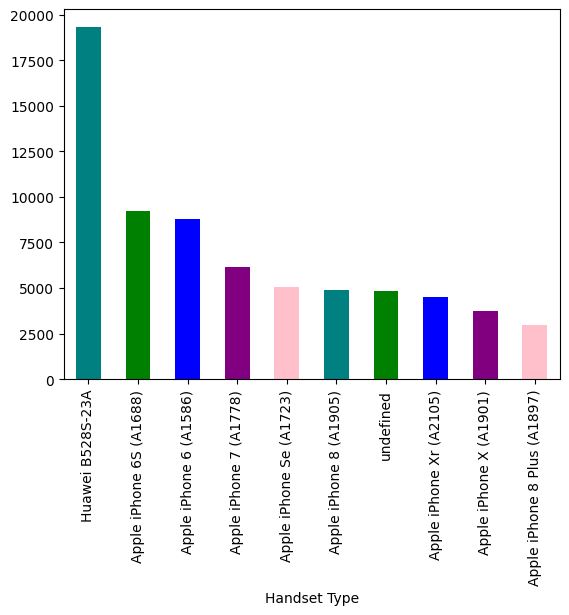

In [6]:
# top 10 handsets used by the customers
top_handsets = clean_data['Handset Type'].value_counts().head(10)
top_handsets[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])

#### top 3 handset manufacturers

<Axes: xlabel='Handset Manufacturer'>

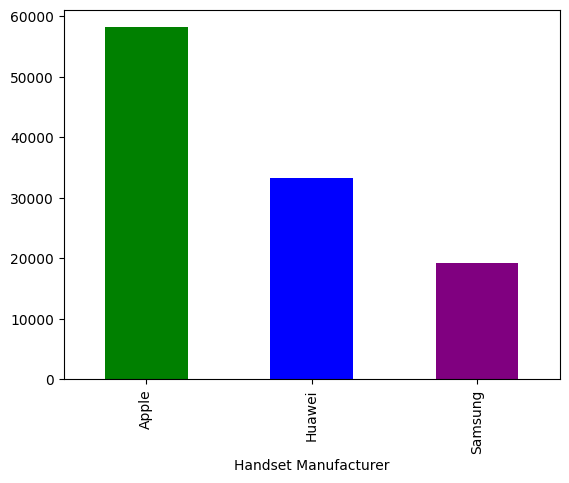

In [7]:
# top 3 handset manufacturers
top_manufacturers = clean_data['Handset Manufacturer'].value_counts().head(3)
top_manufacturers[:3].plot(kind='bar', color=[ 'green', 'blue','purple'])

#### top 5 handsets per top 3 handset manufacturer

In [9]:
top_handsets_per_manufacturer = {}

for manufacturer in top_manufacturers:
    if manufacturer in clean_data['Handset Manufacturer'].unique():
        manufacturer_df = clean_data[clean_data['Handset Manufacturer'] == manufacturer]
        top_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
        top_handsets_per_manufacturer[manufacturer] = top_handsets
    else:
        top_handsets_per_manufacturer[manufacturer] = pd.Series([])

# Step 3: Display the top 5 handsets for each top manufacturer
for manufacturer, top_handsets in top_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_handsets)


Top 5 Handsets for 58190:
Series([], dtype: object)

Top 5 Handsets for 33306:
Series([], dtype: object)

Top 5 Handsets for 19167:
Series([], dtype: object)


### Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application

       MSISDN/Number  Number of xDR Sessions  Total Session Duration (s)  \
0       3.360100e+10                       1                     116.720   
1       3.360100e+10                       1                     181.230   
2       3.360101e+10                       1                      49.878   
3       3.360101e+10                       2                      37.104   
4       3.360101e+10                       1                     128.088   
...              ...                     ...                         ...   
87821   3.378996e+10                       1                      98.826   
87822   3.378997e+10                       1                     160.461   
87823   3.378998e+10                       1                      31.864   
87824   3.379000e+10                       1                       8.810   
87825   3.379000e+10                       1                     140.988   

       Total Download Data (Bytes)  Total Upload Data (Bytes)  \
0                     

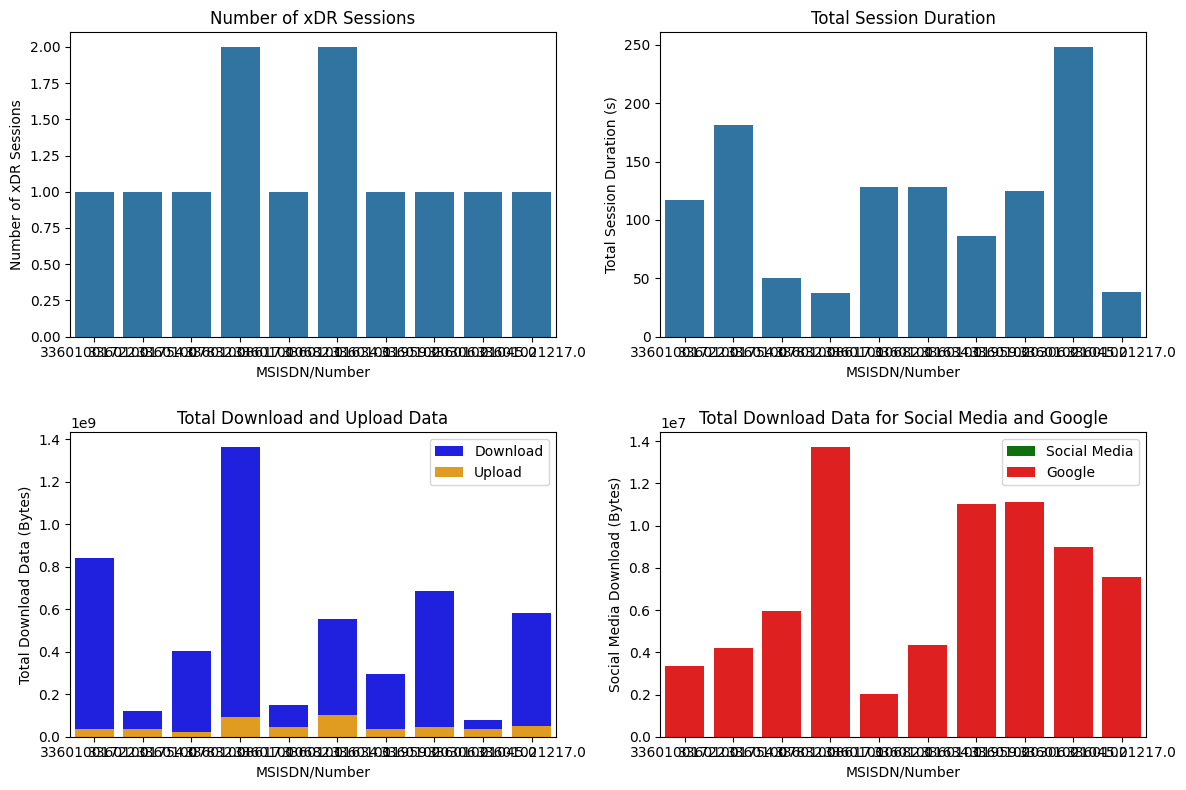

In [14]:

# Convert session duration to seconds (assuming 'Dur. (ms)' is in milliseconds)
clean_data['Session Duration (s)'] = clean_data['Dur. (ms)'] / 1000

# Group by 'MSISDN/Number' and aggregate information
aggregated_data = clean_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                   # Number of xDR sessions
    'Session Duration (s)': 'sum',          # Total session duration
    'Total DL (Bytes)': 'sum',              # Total download data
    'Total UL (Bytes)': 'sum',              # Total upload data
    'Social Media DL (Bytes)': 'sum',       # Total download data for Social Media
    'Social Media UL (Bytes)': 'sum',       # Total upload data for Social Media
    'Google DL (Bytes)': 'sum',             # Total download data for Google
    'Google UL (Bytes)': 'sum',             # Total upload data for Google
    
})

# Rename columns for clarity
aggregated_data.columns = [
    'Number of xDR Sessions',
    'Total Session Duration (s)',
    'Total Download Data (Bytes)',
    'Total Upload Data (Bytes)',
    'Social Media Download (Bytes)',
    'Social Media Upload (Bytes)',
    'Google Download (Bytes)',
    'Google Upload (Bytes)',
]

# Reset index to make 'MSISDN/Number' a regular column
aggregated_data.reset_index(inplace=True)

# Display the aggregated data
print(aggregated_data)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the number of xDR sessions
plt.subplot(2, 2, 1)
sns.barplot(x='MSISDN/Number', y='Number of xDR Sessions', data=aggregated_data.head(10))
plt.title('Number of xDR Sessions')

# Plot the total session duration
plt.subplot(2, 2, 2)
sns.barplot(x='MSISDN/Number', y='Total Session Duration (s)', data=aggregated_data.head(10))
plt.title('Total Session Duration')

# Plot the total download and upload data
plt.subplot(2, 2, 3)
sns.barplot(x='MSISDN/Number', y='Total Download Data (Bytes)', data=aggregated_data.head(10), label='Download', color='blue')
sns.barplot(x='MSISDN/Number', y='Total Upload Data (Bytes)', data=aggregated_data.head(10), label='Upload', color='orange')
plt.title('Total Download and Upload Data')
plt.legend()

# Plot the total download data for Social Media and Google
plt.subplot(2, 2, 4)
sns.barplot(x='MSISDN/Number', y='Social Media Download (Bytes)', data=aggregated_data.head(10), label='Social Media', color='green')
sns.barplot(x='MSISDN/Number', y='Google Download (Bytes)', data=aggregated_data.head(10), label='Google', color='red')
plt.title('Total Download Data for Social Media and Google')
plt.legend()

plt.tight_layout()
plt.show()


#### mean, median, mode

In [15]:
central_tendency_measure = pd.DataFrame(
    { 
     'mean': clean_data.mean(numeric_only=True).values, 
     'median': clean_data.median(numeric_only=True).values,
     'mode': clean_data.mode(numeric_only=True).rename(columns={0: "mode"}).iloc[0].values,
     'min': clean_data.min(numeric_only=True).values,
     'max': clean_data.max(numeric_only=True).values
    }, index=clean_data.select_dtypes(include=np.number).columns.tolist())

central_tendency_measure

,mean,median,mode,min,max
Bearer Id,1.011613e+19,7.349883e+18,1.304243e+19,6.917538e+18,1.318654e+19
Start ms,4.987739e+02,4.990000e+02,3.410000e+02,0.000000e+00,9.990000e+02
End ms,4.989348e+02,5.000000e+02,8.720000e+02,0.000000e+00,9.990000e+02
Dur. (ms),9.613181e+04,8.639900e+04,8.639900e+04,7.142000e+03,1.859336e+06
IMSI,2.082016e+14,2.082015e+14,2.082010e+14,2.082001e+14,2.082099e+14
MSISDN/Number,3.367465e+10,3.366368e+10,3.362578e+10,3.360100e+10,3.379000e+10
IMEI,5.099391e+13,3.573561e+13,3.528141e+13,4.402138e+11,9.900120e+13
Avg RTT DL (ms),1.056550e+02,4.500000e+01,2.800000e+01,0.000000e+00,9.692300e+04
Avg RTT UL (ms),1.761546e+01,5.000000e+00,5.000000e+00,0.000000e+00,7.120000e+03
Avg Bearer TP DL (kbps),1.631639e+04,5.970000e+02,2.300000e+01,0.000000e+00,3.781600e+05


#### histogram of session duration to the most common session lengths and identify any unusual patterns

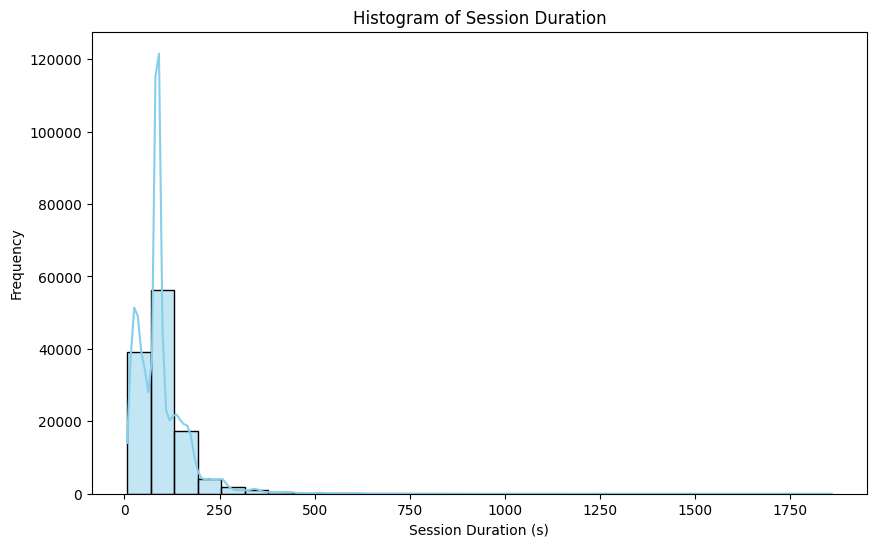

In [19]:
session_duration = clean_data['Session Duration (s)']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(session_duration, bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.title('Histogram of Session Duration')
plt.xlabel('Session Duration (s)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### box plot of download volumes to show the spread of data and highlight potential outliers

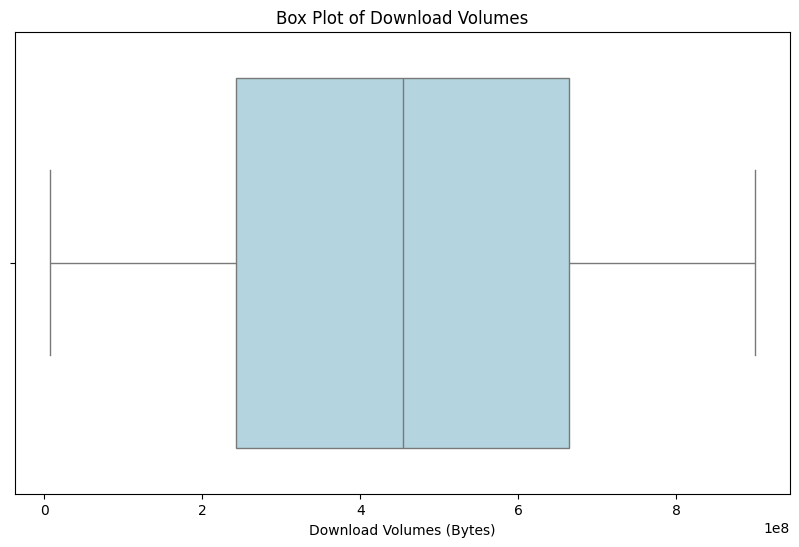

In [20]:
download_volumes = clean_data['Total DL (Bytes)']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=download_volumes, color='lightblue')

# Set plot labels and title
plt.title('Box Plot of Download Volumes')
plt.xlabel('Download Volumes (Bytes)')

# Show the plot
plt.show()

In [ ]:
last_location_counts = clean_data['Last Location Name'].value_counts()

# Set up the plot
plt.figure(figsize=(8, 8))
plt.pie(last_location_counts, labels=last_location_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set plot title
plt.title('Distribution of Sessions Across Last Location Names')

# Show the plot
plt.show()